   # Doaa Mahmoud - Data scientest 
   www.linkedin.com/in/doaa-mahmoud-abdel-aty-01b25b144


### From model training to deployment - an introduction to the SmartPredictor object
Shapash provides a SmartPredictor Object to make prediction and local explainability for operational needs in deployment context.

- It gives a summary of the local explanation of your prediction.
- SmartPredictor allows users to configure the summary to suit their use.
- It is an object dedicated to deployment, lighter than SmartExplainer Object with additionnal consistency checks.
- SmartPredictor can be used with an API or in batch mode.

### This tutorial provides more information to help you getting started with the SmartPredictor Object of Shapash.

# Contents:

- Build a SmartPredictor
- Save and Load a Smartpredictor
- Add input
- Use label and wording
- Summarize explaination

I used Kaggle's customer churn dataset



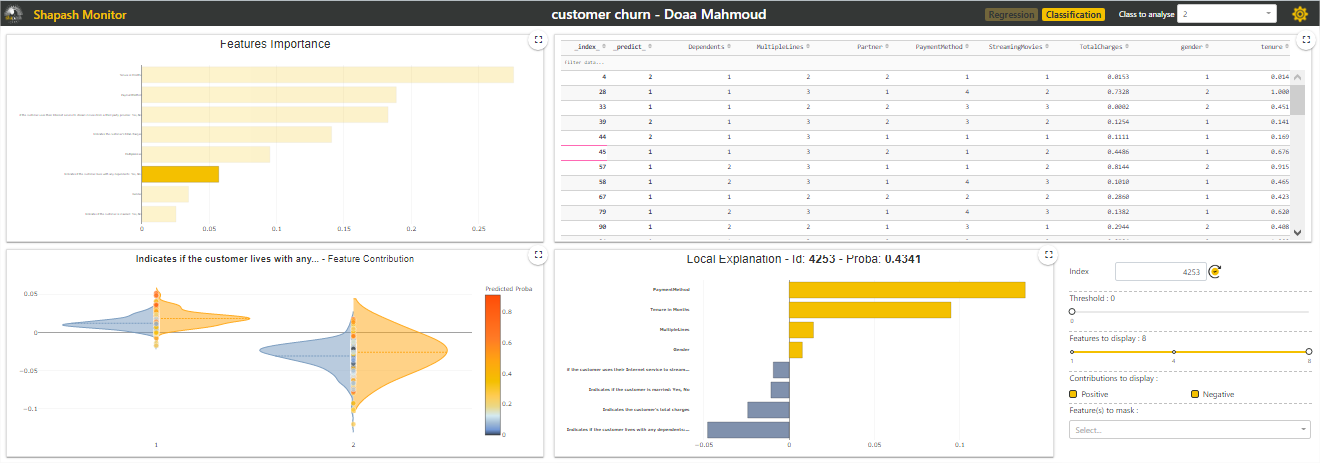

# Exploration and training of the model

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from category_encoders import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
import seaborn as sns

In [ ]:
df = pd.read_csv('Customer churn.csv',sep=',',encoding="utf-8")
df.head(20)

In [ ]:
df.head(5) 



In [ ]:
df.info()

In [ ]:
df.hist(figsize=(12,8))
plt.show()

 ### Missing Values

In [ ]:
df.isnull().sum()

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(),cmap='viridis')
plt.title('Missing Data')

In [ ]:
ten_mean = df['tenure'].mean()
df['tenure'].fillna(ten_mean)

In [ ]:
fill = {"tenure":df['tenure'].mean(),"SeniorCitizen":int(df['SeniorCitizen'].mode())}
df.fillna(fill,inplace=True)

In [ ]:
df.isnull().sum()

# Preprocessing Step
Encoding Categorical Features

### Feature Selection

In [ ]:
df.columns

In [ ]:
columns = ['gender','tenure','Partner','Dependents', 'MultipleLines','PaymentMethod','StreamingMovies','TotalCharges','Churn']
df = df[columns]
df.head()

### Categorical Features
### Create Classification Model
In this section, I train a Machine Learning supervised model with customer churn data. In this example, we are confronted to a classification problem.

In [ ]:
y=df['Churn'].to_frame()
X=df[df.columns.difference(['Churn'])]
df.head(3) 

In [ ]:
from category_encoders import OrdinalEncoder

categorical_features = [col for col in X.columns if X[col].dtype == 'object']

encoder = OrdinalEncoder(
    cols=categorical_features,
    handle_unknown='ignore',
    return_df=True).fit(X)

X=encoder.transform(X)

In [ ]:
from category_encoders import OrdinalEncoder

categorical_features = [col for col in y.columns if y[col].dtype == 'object']

encoder = OrdinalEncoder(
    cols=categorical_features,
    handle_unknown='ignore',
    return_df=True).fit(y)

y=encoder.transform(y)

In [ ]:
y.head()

In [ ]:
X.head()

### Feature Scaling

In [ ]:
ten_min = X['tenure'].min()
ten_max = X['tenure'].max()
X['tenure'] = (X['tenure']-ten_min)/(ten_max-ten_min)

In [ ]:
tot_min = X['TotalCharges'].min()
tot_max = X['TotalCharges'].max()
X['TotalCharges'] = (X['TotalCharges']-tot_min)/(tot_max-tot_min)

In [ ]:
X.head()

# Train Test split + Random Forest fit


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestClassifier
import shap

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=0.75, random_state=1)

rf = RandomForestClassifier(n_estimators=100, min_samples_leaf=3)
rf.fit(Xtrain, ytrain)

In [ ]:
rf.score(Xtrain,ytrain)

In [ ]:
rf.score(Xtest,ytest)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [ ]:
ypred=pd.DataFrame(rf.predict(Xtest), columns=['pred'], index=Xtest.index)

In [ ]:
confusion_matrix(ytest, ypred)

In [ ]:
accuracy_score(ytest, ypred)

In [ ]:
print(classification_report(ytest, ypred))

In [ ]:
data_dict = {'gender': 'Gender',
             'tenure': "Tenure in Months", 
             'Partner': 'Indicates if the customer is married: Yes, No',
             'Dependents': 'Indicates if the customer lives with any dependents: Yes, No.',
             'TotalCharges': "Indicates the customer’s total charges", 
             'StreamingMovies': 'if the customer uses their Internet service to stream movies from a third party provider: Yes, No',
             'Churn': 'Indicates if the customer  customer will remain in service or not'}

In [ ]:
from shapash.explainer.smart_explainer import SmartExplainer

## Define a SmartExplainer

In [ ]:
xpl = SmartExplainer(features_dict=data_dict) # optional parameter, specifies label for features name

# compile()
This method is the first step to understand model and prediction. It performs the sorting of contributions, the reverse preprocessing steps and all the calculations necessary for a quick display of plots and efficient summary of explanation. 


In [ ]:
xpl.compile(
    x=Xtest,
    model=rf,
    y_pred=ypred,
)


In [ ]:
xpl.plot.features_importance()


In [ ]:
xpl.plot.contribution_plot("StreamingMovies")


In [ ]:
xpl.plot.contribution_plot("gender")

In [ ]:
xpl.plot.contribution_plot("PaymentMethod")

In [ ]:
xpl.plot.contribution_plot("MultipleLines")

In [ ]:
xpl.plot.contribution_plot("tenure")

In [ ]:
xpl.plot.contribution_plot("TotalCharges")

In [ ]:
xpl.plot.contribution_plot("Dependents")

In [ ]:
xpl.plot.compare_plot(index=[Xtest.index[0], Xtest.index[1]])


In [ ]:
xpl.plot.compare_plot(row_num=[0, 1, 2, 3, 4], max_features=8)


In [ ]:
xpl.plot.compare_plot(row_num=[0, 1,2 ,3], show_predict=False, max_features=100)

In [ ]:
app = xpl.run_app(title_story='customer churn - Doaa Mahmoud')

In [ ]:
app.kill()


In [ ]:

summary_df= xpl.to_pandas(
    max_contrib=9, # Number Max of features to show in summary
    threshold=500,
)

In [ ]:
summary_df.head()

In [ ]:
xpl.save('./xpl.pkl')

# Great Work !